In [1]:
from IPython.display import display, HTML
display(HTML('<link rel="preconnect" href="https://fonts.googleapis.com">\
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\
<link href="https://fonts.googleapis.com/css2?family=Comfortaa:wght@300&display=swap" rel="stylesheet">'))

<font face="Comfortaa"><h1> British Airways

<font face="Comfortaa"><h2> 1. Data Collection - Web Scraping

In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'axes.facecolor':'black'})
sns.set_palette("pastel")

In [4]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
else:
    print("Failed to retrieve the page")

In [5]:
soup = BeautifulSoup(html_content, 'html.parser')

In [6]:
navigation_bar = soup.find_all('article', class_='comp comp_reviews-pagination querylist-pagination position-')
if navigation_bar:
    navigation_bar = navigation_bar[-1]
    li_element = navigation_bar.find_all('li')
    if li_element:
        last_li = li_element[-1]
        a_element = last_li.find('a')
        link = a_element['href']

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_reviews(url):
    reviews = []

    while url:
        response = requests.get(url)
        
        if response.status_code == 200:
            html_content = response.content
            soup = BeautifulSoup(html_content, 'html.parser')
            
            for article in soup.find_all('article'):
                review = article.find('div', class_='body')
                if review:
                    review_id = review['id']
                    review_header = review.find('h2', class_='text_header').text
                    review_author_location_date = review.find('h3').text
                    review_content = review.find('div', class_='tc_mobile')
                    review_body = review_content.find('div', class_='text_content').text
                    review_rating_table = review_content.find('table', class_='review-ratings')
                    for tr in review_rating_table.find_all('tr'):
                        td_elements = tr.find_all('td')
                        if len(td_elements) >= 2:
                            rating_name = td_elements[0].text
                            rating_value_td = td_elements[1]
                            rating_value = rating_value_td.text

                            span_elements = rating_value_td.find_all('span', class_='star fill')
                            count_fill_spans = len(span_elements)
                            reviews.append({
                            'review_id': review_id,
                            'review_header': review_header,
                            'review_author_location_date': review_author_location_date,
                            'review_body': review_body,
                            'rating_name': rating_name,
                            'rating_value': count_fill_spans if span_elements else rating_value
                            })

            
            navigation_bar = soup.find_all('article', class_='comp comp_reviews-pagination querylist-pagination position-')
            if navigation_bar:
                navigation_bar = navigation_bar[-1]
                li_element = navigation_bar.find_all('li')
                if li_element:
                    last_li = li_element[-1]
                    a_element = last_li.find('a')
                    if a_element:
                        url = a_element['href']
                        url = "https://www.airlinequality.com/"+url
                        print(url)
                    else:
                        url = None
                else:
                    url = None
            else:
                url = None
                
        else:
            print(f"Failed to retrieve the page: {url}")
            break
    
    return reviews

In [8]:
start_url = "https://www.airlinequality.com/airline-reviews/british-airways"
all_reviews = scrape_reviews(start_url)


https://www.airlinequality.com//airline-reviews/british-airways/page/2/
https://www.airlinequality.com//airline-reviews/british-airways/page/3/
https://www.airlinequality.com//airline-reviews/british-airways/page/4/
https://www.airlinequality.com//airline-reviews/british-airways/page/5/
https://www.airlinequality.com//airline-reviews/british-airways/page/6/
https://www.airlinequality.com//airline-reviews/british-airways/page/7/
https://www.airlinequality.com//airline-reviews/british-airways/page/8/
https://www.airlinequality.com//airline-reviews/british-airways/page/9/
https://www.airlinequality.com//airline-reviews/british-airways/page/10/
https://www.airlinequality.com//airline-reviews/british-airways/page/11/
https://www.airlinequality.com//airline-reviews/british-airways/page/12/
https://www.airlinequality.com//airline-reviews/british-airways/page/13/
https://www.airlinequality.com//airline-reviews/british-airways/page/14/
https://www.airlinequality.com//airline-reviews/british-air

https://www.airlinequality.com//airline-reviews/british-airways/page/115/
https://www.airlinequality.com//airline-reviews/british-airways/page/116/
https://www.airlinequality.com//airline-reviews/british-airways/page/117/
https://www.airlinequality.com//airline-reviews/british-airways/page/118/
https://www.airlinequality.com//airline-reviews/british-airways/page/119/
https://www.airlinequality.com//airline-reviews/british-airways/page/120/
https://www.airlinequality.com//airline-reviews/british-airways/page/121/
https://www.airlinequality.com//airline-reviews/british-airways/page/122/
https://www.airlinequality.com//airline-reviews/british-airways/page/123/
https://www.airlinequality.com//airline-reviews/british-airways/page/124/
https://www.airlinequality.com//airline-reviews/british-airways/page/125/
https://www.airlinequality.com//airline-reviews/british-airways/page/126/
https://www.airlinequality.com//airline-reviews/british-airways/page/127/
https://www.airlinequality.com//airlin

https://www.airlinequality.com//airline-reviews/british-airways/page/226/
https://www.airlinequality.com//airline-reviews/british-airways/page/227/
https://www.airlinequality.com//airline-reviews/british-airways/page/228/
https://www.airlinequality.com//airline-reviews/british-airways/page/229/
https://www.airlinequality.com//airline-reviews/british-airways/page/230/
https://www.airlinequality.com//airline-reviews/british-airways/page/231/
https://www.airlinequality.com//airline-reviews/british-airways/page/232/
https://www.airlinequality.com//airline-reviews/british-airways/page/233/
https://www.airlinequality.com//airline-reviews/british-airways/page/234/
https://www.airlinequality.com//airline-reviews/british-airways/page/235/
https://www.airlinequality.com//airline-reviews/british-airways/page/236/
https://www.airlinequality.com//airline-reviews/british-airways/page/237/
https://www.airlinequality.com//airline-reviews/british-airways/page/238/
https://www.airlinequality.com//airlin

https://www.airlinequality.com//airline-reviews/british-airways/page/337/
https://www.airlinequality.com//airline-reviews/british-airways/page/338/
https://www.airlinequality.com//airline-reviews/british-airways/page/339/
https://www.airlinequality.com//airline-reviews/british-airways/page/340/
https://www.airlinequality.com//airline-reviews/british-airways/page/341/
https://www.airlinequality.com//airline-reviews/british-airways/page/342/
https://www.airlinequality.com//airline-reviews/british-airways/page/343/
https://www.airlinequality.com//airline-reviews/british-airways/page/344/
https://www.airlinequality.com//airline-reviews/british-airways/page/345/
https://www.airlinequality.com//airline-reviews/british-airways/page/346/
https://www.airlinequality.com//airline-reviews/british-airways/page/347/
https://www.airlinequality.com//airline-reviews/british-airways/page/348/
https://www.airlinequality.com//airline-reviews/british-airways/page/349/
https://www.airlinequality.com//airlin

<font face="Comfortaa"><h2>2. Store Data into Dataframe

In [9]:
reviews_df = pd.DataFrame(all_reviews)
# reviews_df.to_csv('airline_reviews.csv', index=False)

In [10]:
reviews_df = reviews_df.drop_duplicates()

In [11]:
reviews_df.head()

,review_id,review_header,review_author_location_date,review_body,rating_name,rating_value
0,anchor872036,"""service on board was impeccable""",\n\nPeter Costello (United Kingdom) 11th Septe...,✅ Trip Verified | Despite boarding being the u...,Aircraft,Boeing 787
1,anchor872036,"""service on board was impeccable""",\n\nPeter Costello (United Kingdom) 11th Septe...,✅ Trip Verified | Despite boarding being the u...,Type Of Traveller,Couple Leisure
2,anchor872036,"""service on board was impeccable""",\n\nPeter Costello (United Kingdom) 11th Septe...,✅ Trip Verified | Despite boarding being the u...,Seat Type,Business Class
3,anchor872036,"""service on board was impeccable""",\n\nPeter Costello (United Kingdom) 11th Septe...,✅ Trip Verified | Despite boarding being the u...,Route,London to Santiago
4,anchor872036,"""service on board was impeccable""",\n\nPeter Costello (United Kingdom) 11th Septe...,✅ Trip Verified | Despite boarding being the u...,Date Flown,September 2023


<font face="Comfortaa"><h2>3. Data Cleaning

<font face="Comfortaa"><h3>3.1 Pivoting Table

In [12]:
reviews_df = reviews_df.pivot(index=['review_id', 'review_header', 'review_author_location_date', 'review_body'], columns='rating_name', values='rating_value').reset_index()

In [13]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   review_id                    3554 non-null   object
 1   review_header                3554 non-null   object
 2   review_author_location_date  3554 non-null   object
 3   review_body                  3554 non-null   object
 4   Aircraft                     1894 non-null   object
 5   Cabin Staff Service          3431 non-null   object
 6   Date Flown                   2869 non-null   object
 7   Food & Beverages             3178 non-null   object
 8   Ground Service               2803 non-null   object
 9   Inflight Entertainment       2440 non-null   object
 10  Recommended                  3554 non-null   object
 11  Route                        2872 non-null   object
 12  Seat Comfort                 3442 non-null   object
 13  Seat Type                    3552

In [14]:
reviews_df.head()

rating_name,review_id,review_header,review_author_location_date,review_body,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,anchor243654,British Airways customer review,\n\nKidd William (United Kingdom) 23rd June 2014,I flew from Edinburgh to Heathrow and then on ...,NaN,2,NaN,1,NaN,3,no,NaN,1,Economy Class,NaN,2,NaN
1,anchor243655,British Airways customer review,\n\nL Bell (United Kingdom) 20th June 2014,We travelled Cancun to LGW in business class. ...,NaN,2,NaN,3,NaN,4,no,NaN,4,Business Class,NaN,4,NaN
2,anchor243656,British Airways customer review,\n\nRobert Kovacs (United States) 20th June 2014,I was excited to fly on the new A380 with the ...,NaN,3,NaN,2,NaN,1,no,NaN,1,Business Class,NaN,1,NaN
3,anchor243657,British Airways customer review,\n\nSears Michael (United Kingdom) 20th June 2014,Club World–LGW to TPA week later MIA to LHR. G...,NaN,5,NaN,3,NaN,5,yes,NaN,5,Business Class,NaN,5,NaN
4,anchor243658,British Airways customer review,\n\nMark Gentleman (United Kingdom) 20th June ...,EDI-LHR-FCO-LHR-EDI. EDI lounge good. Flight t...,NaN,5,NaN,5,NaN,5,yes,NaN,5,Business Class,NaN,5,NaN


<font face="Comfortaa"><h3>3.2 Split Column

In [15]:
reviews_df['review_author_location_date'] = reviews_df['review_author_location_date'].str.replace('\n\n', '')
split_cols = reviews_df['review_author_location_date'].str.split(r'\(|\)', expand = True)

In [16]:
reviews_df['author'] = split_cols[0]
reviews_df['location'] = split_cols[1]
reviews_df['date'] = split_cols[2]

In [17]:
reviews_df.head()

rating_name,review_id,review_header,review_author_location_date,review_body,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,author,location,date
0,anchor243654,British Airways customer review,Kidd William (United Kingdom) 23rd June 2014,I flew from Edinburgh to Heathrow and then on ...,NaN,2,NaN,1,NaN,3,no,NaN,1,Economy Class,NaN,2,NaN,Kidd William,United Kingdom,23rd June 2014
1,anchor243655,British Airways customer review,L Bell (United Kingdom) 20th June 2014,We travelled Cancun to LGW in business class. ...,NaN,2,NaN,3,NaN,4,no,NaN,4,Business Class,NaN,4,NaN,L Bell,United Kingdom,20th June 2014
2,anchor243656,British Airways customer review,Robert Kovacs (United States) 20th June 2014,I was excited to fly on the new A380 with the ...,NaN,3,NaN,2,NaN,1,no,NaN,1,Business Class,NaN,1,NaN,Robert Kovacs,United States,20th June 2014
3,anchor243657,British Airways customer review,Sears Michael (United Kingdom) 20th June 2014,Club World–LGW to TPA week later MIA to LHR. G...,NaN,5,NaN,3,NaN,5,yes,NaN,5,Business Class,NaN,5,NaN,Sears Michael,United Kingdom,20th June 2014
4,anchor243658,British Airways customer review,Mark Gentleman (United Kingdom) 20th June 2014,EDI-LHR-FCO-LHR-EDI. EDI lounge good. Flight t...,NaN,5,NaN,5,NaN,5,yes,NaN,5,Business Class,NaN,5,NaN,Mark Gentleman,United Kingdom,20th June 2014


In [18]:
reviews_df.describe(include='all')

rating_name,review_id,review_header,review_author_location_date,review_body,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,author,location,date
count,3554,3554,3554,3554,1894,3431,2869,3178,2803,2440,3554,2872,3442,3552,2876,3554,588,3554,3552,3552
unique,3554,2631,3450,3552,199,5,110,6,5,6,2,1566,5,4,4,6,5,2860,71,1783
top,anchor243654,British Airways customer review,James Williamson (United Kingdom) 12th June 2015,British Airways from Tampa to Gatwick on Boein...,A320,5,August 2015,1,1,1,no,London to Johannesburg,3,Economy Class,Couple Leisure,1,1,Clive Drake,United Kingdom,20th November 2014
freq,1,863,4,2,351,996,83,960,842,750,2121,17,821,1853,973,1150,359,31,2237,16


In [19]:
reviews_df = reviews_df.drop(axis=1, columns=['review_author_location_date'])

In [20]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               3554 non-null   object
 1   review_header           3554 non-null   object
 2   review_body             3554 non-null   object
 3   Aircraft                1894 non-null   object
 4   Cabin Staff Service     3431 non-null   object
 5   Date Flown              2869 non-null   object
 6   Food & Beverages        3178 non-null   object
 7   Ground Service          2803 non-null   object
 8   Inflight Entertainment  2440 non-null   object
 9   Recommended             3554 non-null   object
 10  Route                   2872 non-null   object
 11  Seat Comfort            3442 non-null   object
 12  Seat Type               3552 non-null   object
 13  Type Of Traveller       2876 non-null   object
 14  Value For Money         3554 non-null   object
 15  Wifi

In [21]:
reviews_df.columns = ['id', 'header', 'body', 'aircraft', 'cabin_staff_service', 'flown_date', 'fnb',\
                       'ground_service', 'inflight_entertainment', 'recommended', 'route', 'seat_comfort', \
                       'seat_type', 'traveller_type', 'value_for_money', 'wifi', 'author', 'location', 'review_date']

In [22]:
reviews_df.head()

,id,header,body,aircraft,cabin_staff_service,flown_date,fnb,ground_service,inflight_entertainment,recommended,route,seat_comfort,seat_type,traveller_type,value_for_money,wifi,author,location,review_date
0,anchor243654,British Airways customer review,I flew from Edinburgh to Heathrow and then on ...,NaN,2,NaN,1,NaN,3,no,NaN,1,Economy Class,NaN,2,NaN,Kidd William,United Kingdom,23rd June 2014
1,anchor243655,British Airways customer review,We travelled Cancun to LGW in business class. ...,NaN,2,NaN,3,NaN,4,no,NaN,4,Business Class,NaN,4,NaN,L Bell,United Kingdom,20th June 2014
2,anchor243656,British Airways customer review,I was excited to fly on the new A380 with the ...,NaN,3,NaN,2,NaN,1,no,NaN,1,Business Class,NaN,1,NaN,Robert Kovacs,United States,20th June 2014
3,anchor243657,British Airways customer review,Club World–LGW to TPA week later MIA to LHR. G...,NaN,5,NaN,3,NaN,5,yes,NaN,5,Business Class,NaN,5,NaN,Sears Michael,United Kingdom,20th June 2014
4,anchor243658,British Airways customer review,EDI-LHR-FCO-LHR-EDI. EDI lounge good. Flight t...,NaN,5,NaN,5,NaN,5,yes,NaN,5,Business Class,NaN,5,NaN,Mark Gentleman,United Kingdom,20th June 2014


<font face="Comfortaa"><h3>3.3 Replace "N/A" with NaN

In [23]:
reviews_df['fnb'] = reviews_df['fnb'].replace('N/A', np.nan)
reviews_df['inflight_entertainment'] = reviews_df['inflight_entertainment'].replace('N/A', np.nan)
reviews_df['seat_comfort'] = reviews_df['seat_comfort'].replace('N/A', np.nan)
reviews_df['value_for_money'] = reviews_df['value_for_money'].replace('N/A', np.nan)

<font face="Comfortaa"><h3>3.4 Convert Into Correct Data Type 

In [24]:
#float
reviews_df['cabin_staff_service'] = reviews_df['cabin_staff_service'].astype('float')
reviews_df['ground_service'] = reviews_df['ground_service'].astype('float')
reviews_df['fnb'] = reviews_df['fnb'].astype('float')
reviews_df['inflight_entertainment'] = reviews_df['inflight_entertainment'].astype('float')
reviews_df['seat_comfort'] = reviews_df['seat_comfort'].astype('float')
reviews_df['value_for_money'] = reviews_df['value_for_money'].astype('float')
reviews_df['wifi'] = reviews_df['wifi'].astype('float')

#date
reviews_df['flown_date'] = pd.to_datetime(reviews_df['flown_date'], errors='coerce')
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')


In [25]:
reviews_df.head()

,id,header,body,aircraft,cabin_staff_service,flown_date,fnb,ground_service,inflight_entertainment,recommended,route,seat_comfort,seat_type,traveller_type,value_for_money,wifi,author,location,review_date
0,anchor243654,British Airways customer review,I flew from Edinburgh to Heathrow and then on ...,NaN,2.0,NaT,1.0,NaN,3.0,no,NaN,1.0,Economy Class,NaN,2.0,NaN,Kidd William,United Kingdom,2014-06-23
1,anchor243655,British Airways customer review,We travelled Cancun to LGW in business class. ...,NaN,2.0,NaT,3.0,NaN,4.0,no,NaN,4.0,Business Class,NaN,4.0,NaN,L Bell,United Kingdom,2014-06-20
2,anchor243656,British Airways customer review,I was excited to fly on the new A380 with the ...,NaN,3.0,NaT,2.0,NaN,1.0,no,NaN,1.0,Business Class,NaN,1.0,NaN,Robert Kovacs,United States,2014-06-20
3,anchor243657,British Airways customer review,Club World–LGW to TPA week later MIA to LHR. G...,NaN,5.0,NaT,3.0,NaN,5.0,yes,NaN,5.0,Business Class,NaN,5.0,NaN,Sears Michael,United Kingdom,2014-06-20
4,anchor243658,British Airways customer review,EDI-LHR-FCO-LHR-EDI. EDI lounge good. Flight t...,NaN,5.0,NaT,5.0,NaN,5.0,yes,NaN,5.0,Business Class,NaN,5.0,NaN,Mark Gentleman,United Kingdom,2014-06-20


<font face="Comfortaa"><h2>4. Exploratory Data Analysis

<font face="Comfortaa"><h3>4.1 Understand Data

In [27]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3554 non-null   object        
 1   header                  3554 non-null   object        
 2   body                    3554 non-null   object        
 3   aircraft                1894 non-null   object        
 4   cabin_staff_service     3431 non-null   float64       
 5   flown_date              2869 non-null   datetime64[ns]
 6   fnb                     3177 non-null   float64       
 7   ground_service          2803 non-null   float64       
 8   inflight_entertainment  2431 non-null   float64       
 9   recommended             3554 non-null   object        
 10  route                   2872 non-null   object        
 11  seat_comfort            3442 non-null   float64       
 12  seat_type               3552 non-null   object  

<font face="Comfortaa"><h3>4.2 Statistical Analysis

In [28]:
reviews_df.describe()

,cabin_staff_service,fnb,ground_service,inflight_entertainment,seat_comfort,value_for_money,wifi
count,3431.000000,3177.000000,2803.000000,2431.000000,3442.000000,3553.000000,588.000000
mean,3.252696,2.711363,2.799144,2.651172,2.870424,2.683366,1.930272
std,1.488529,1.439625,1.455002,1.402554,1.358689,1.465710,1.357760
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


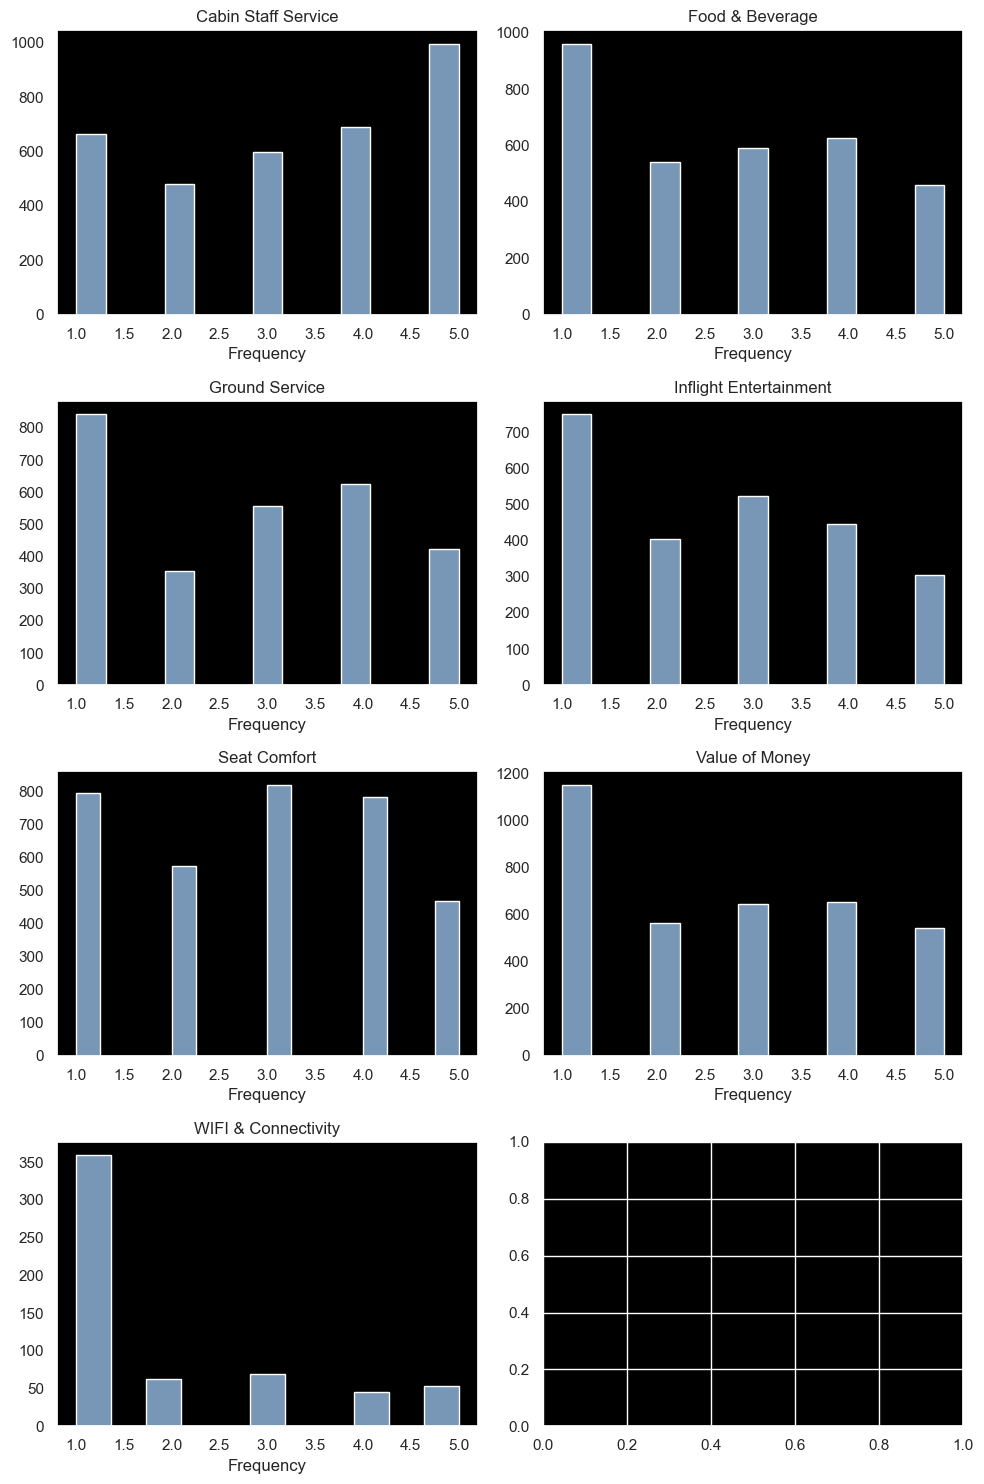

In [29]:
numerical_variables = reviews_df.describe().columns.to_list()
title_names = ['Cabin Staff Service', 'Food & Beverage', 'Ground Service', 'Inflight Entertainment', 'Seat Comfort', 'Value of Money', 'WIFI & Connectivity']

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10, 15))

for n, var in enumerate(numerical_variables):
    i = n // 2
    j = n % 2
    sns.histplot(data=reviews_df, x=var, ax=ax[i, j])
    ax[i, j].set(xlabel='Frequency', ylabel='', title=title_names[n])
    ax[i, j].grid(False)

    plt.tight_layout()
plt.show()

<font face="Comfortaa">
    <h4><b> Statistical Summary: <b></h4> 
    <b>WIFI & Connectivity </b> received the highest percentage of 1-star reviews  & lowest median at 1.93.<br> 
    <b>Cabin Staff Service </b> received the highest percentage of 5-star reviews & highest median at 3.24.<br>
    <b>Seat Comfort</b> received relatively equal numbers of reviews throughout 1 to 5 stars & second highest median at 2.87. <br>
        All of the other review type including <b>Food & Beverage</b>, <b>Ground Service</b>, <b>Inflight Entertainment</b>, <b>Value of Money</b> although receieved more 1 star review but the medians range between 2.65 to 2.80.  
 </font>

<font face="Comfortaa"><h3>4.2 Sentimental Analysis

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Chieng Bao
[nltk_data]     Qing\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
analyzer = SentimentIntensityAnalyzer()

In [33]:
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [34]:
reviews_df['sentiment'] = reviews_df['body'].apply(get_sentiment)

In [35]:
reviews_df['sentiment'] = reviews_df['sentiment'].astype('category')
reviews_df['sentiment'] = reviews_df['sentiment'].cat.set_categories(['Positive', 'Negative', 'Neutral'])

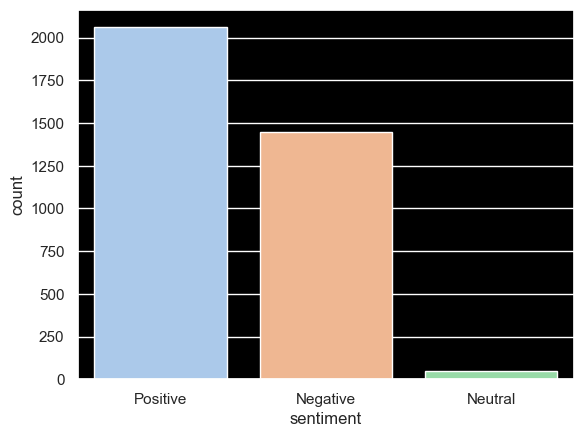

In [36]:
sns.countplot(data = reviews_df,\
            x = 'sentiment')
plt.show()

In [37]:
reviews_df['recommended'].value_counts()

no     2121
yes    1433
Name: recommended, dtype: int64

In [38]:
reviews_df.groupby(['recommended','sentiment'])['id'].count()

recommended  sentiment
no           Positive      743
             Negative     1336
             Neutral        42
yes          Positive     1317
             Negative      109
             Neutral         7
Name: id, dtype: int64

<font face="Comfortaa">
    <h4><b> Sentimental Summary: </b></h4> 
    In conducting sentiment analysis using VADER, the majority of the reviews were found to be <b>Positive</b>," followed by <b>"Negative"</b> with a relatively small number categorized as <b>"Neutral" </b>. <br> However, this sentiment analysis appears to contradict the data in the <b>recommended</b> column, where a significant portion of reviewers did not recommend booking with the airline.<b>British Airways</b>. By taking a closer look, most of the sentiment were in line with recommended column. Moving forward, it would be valuable to delve deeper into the reviews to understand why the sentiment is categorized as positive despite many users not recommending the airline.
    
 </font>

<font face="Comfortaa"><h3>4.3 Time Series Analysis

In [39]:
reviews_df['date_diff'] = reviews_df['review_date'] - reviews_df['flown_date']

In [40]:
reviews_df['review_month'] = reviews_df['review_date'].dt.month
reviews_df['flown_month'] = reviews_df['flown_date'].dt.month

In [41]:
reviews_df['recommended'] = reviews_df['recommended'].astype('category')
reviews_df['recommended'] = reviews_df['recommended'].cat.set_categories(['yes','no'])

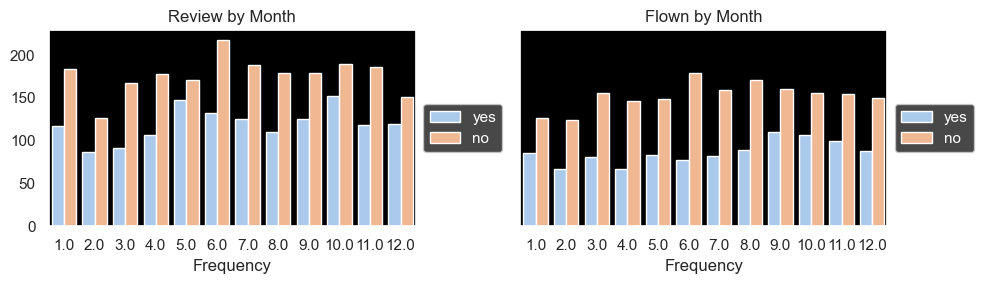

In [42]:
date_cols = ['review_month', 'flown_month']
title_name = ['Review by Month', 'Flown by Month']
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 3), sharey=True)

for n, var in enumerate(date_cols):
    sns.countplot(data=reviews_df, x=var, ax=ax[n], hue = 'recommended')
    ax[n].set(xlabel='Frequency', ylabel='', title=title_name[n])
    ax[n].grid(False)
    ax[n].legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='k', labelcolor='w')
plt.tight_layout()
plt.show()

In [43]:
reviews_df['review_month'].value_counts()

6.0     350
10.0    342
5.0     319
7.0     314
9.0     304
11.0    304
1.0     301
8.0     289
4.0     285
12.0    271
3.0     259
2.0     214
Name: review_month, dtype: int64

<font face='Comfortaa'>
    <b>Time Series Summary:</b><br>
    In the course of the time series analysis conducted on review dates and flown dates within the dataset, it was observed that not all reviews were paired with corresponding flown dates, indicating potential data gaps.<br>

The distribution of reviews across months revealed that June had the highest number of reviews, totaling 354 and highest number of negative reviews. These two months stood out as periods of increased customer feedback. <br>

A noteworthy trend that emerged across all months was that a significant proportion of reviewers chose not to recommend the airline. This consistent sentiment of dissatisfaction suggests that a substantial segment of customers had reservations about recommending the airline during this period.<br>
    
</font>

<font face="Comfortaa"><h3>4.4 Word Cloud

In [44]:
from wordcloud import WordCloud
text_data = reviews_df['body'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)

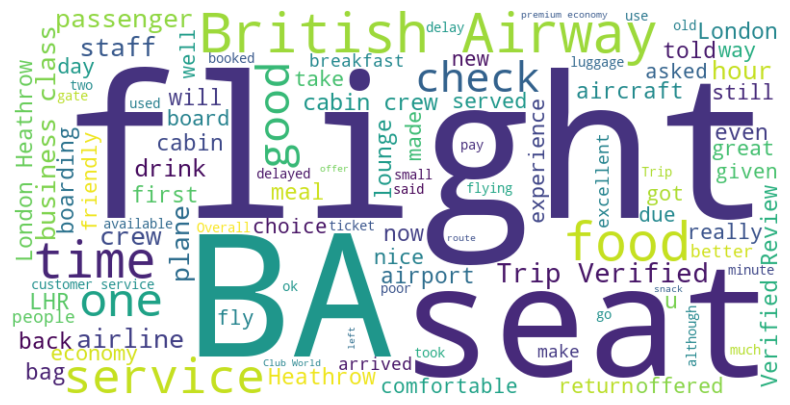

In [45]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<font face='Comfortaa'>
    <b>WordCloud Summary:</b><br>
    It appears to cover a range of aspects, including airport experiences, cabin service, delays, and more.
    
</font>